In [1]:
import scvelo as scv
import scanpy as sc
import pandas as pd
import numpy as np
import scipy
import pickle
import anndata as ad
import os

In [2]:
def export_data(adata:ad.AnnData, datapath:str = "", celltype:str = "celltype", embedding:str = "X_umap") -> None:
    pseudotime = adata.obs["dpt_pseudotime"].tolist()
    mu = pd.DataFrame(adata.layers["Mu"].T, columns = adata.obs_names, index = adata.var_names)
    ms = pd.DataFrame(adata.layers["Ms"].T, columns = adata.obs_names, index = adata.var_names)
    celltypes = adata.obs[celltype].tolist()
    leiden = adata.obs["leiden"].tolist()
    embeddings = adata.obsm[embedding]
    
    mu.to_csv(os.path.join(datapath, "Mu.csv"))
    ms.to_csv(os.path.join(datapath, "Ms.csv"))
    with open(os.path.join(datapath, "pseudotime.pkl"), "wb") as f:
        pickle.dump(pseudotime, f)
    with open(os.path.join(datapath, "celltype.pkl"), "wb") as f:
        pickle.dump(celltypes, f)
    with open(os.path.join(datapath, "clusters.pkl"), "wb") as f:
        pickle.dump(leiden, f)
    with open(os.path.join(datapath, "embedding.pkl"), "wb") as f:
        pickle.dump(embeddings, f)

In [3]:
adata = scv.datasets.pancreatic_endocrinogenesis()

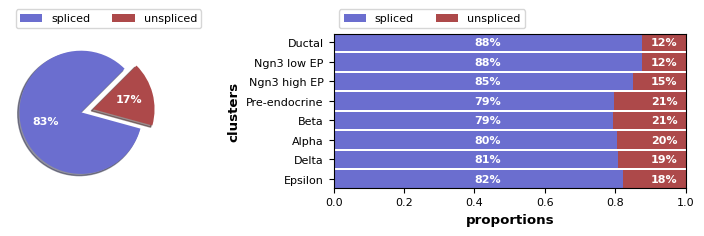

In [4]:
scv.pl.proportions(adata, groupby = "clusters")

In [5]:
scv.pp.filter_and_normalize(adata, min_shared_counts = 20, n_top_genes = 2000)
scv.pp.moments(adata, n_pcs = 30, n_neighbors = 30)

Filtered out 20801 genes that are detected 20 counts (shared).
Normalized count data: X, spliced, unspliced.
Extracted 2000 highly variable genes.
Logarithmized X.
computing neighbors
    finished (0:00:02) --> added 
    'distances' and 'connectivities', weighted adjacency matrices (adata.obsp)
computing moments based on connectivities
    finished (0:00:00) --> added 
    'Ms' and 'Mu', moments of un/spliced abundances (adata.layers)


In [6]:
sc.tl.leiden(adata)

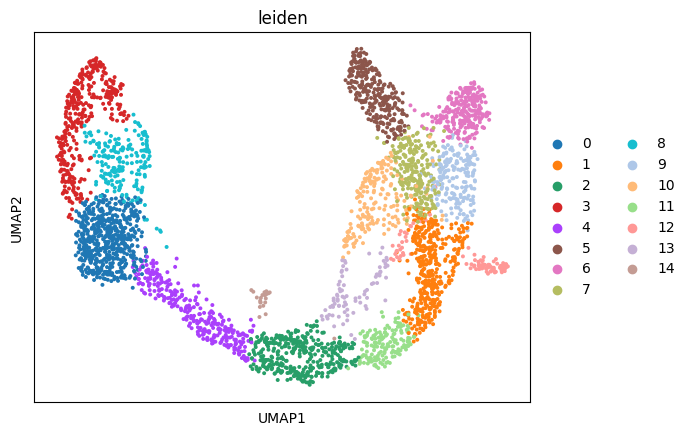

In [7]:
sc.pl.umap(adata, color = "leiden")

In [8]:
adata.uns["iroot"] = np.flatnonzero(adata.obs["leiden"] == '0')[0]

In [9]:
sc.tl.dpt(adata)

In [10]:
adata

AnnData object with n_obs × n_vars = 3696 × 2000
    obs: 'clusters_coarse', 'clusters', 'S_score', 'G2M_score', 'initial_size_unspliced', 'initial_size_spliced', 'initial_size', 'n_counts', 'leiden', 'dpt_pseudotime'
    var: 'highly_variable_genes', 'gene_count_corr', 'means', 'dispersions', 'dispersions_norm', 'highly_variable'
    uns: 'clusters_coarse_colors', 'clusters_colors', 'day_colors', 'neighbors', 'pca', 'leiden', 'leiden_colors', 'iroot', 'diffmap_evals'
    obsm: 'X_pca', 'X_umap', 'X_diffmap'
    layers: 'spliced', 'unspliced', 'Ms', 'Mu'
    obsp: 'distances', 'connectivities'

In [11]:
export_data(adata, datapath = "data", celltype = "clusters")